# House price prediction

### Objectives
The main objective of this project is to predict the price of the home based on the customer requirement.It analyzes the housing data from Ames and Iowa and built a suitable machine learning model and predicts the final price based on customer requirements.

### Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

### load the data

In [2]:
df=pd.read_csv('data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Our target variable is saleprice

# 1.> Data analysis report

##### basic checks for understanding data

In [3]:
df.shape

(1460, 81)

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Filling the missing values

In [6]:
missing_values=df.isnull().sum().sort_values(ascending=False)
M_V=missing_values[missing_values>0]
M_V

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [ ]:
df.isnull().sum().sum()

In [7]:
categorical_columns=df.select_dtypes(include='object').columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
categorical_missing_values=['Alley','Fence','PoolQC','MiscFeature','MasVnrType','FireplaceQu',
                            'GarageQual','GarageFinish','GarageType','GarageCond','BsmtFinType2',
                            'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1']

In [10]:
numerical_columns=df.select_dtypes(exclude='object').columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
numerical_missing_columns=['LotFrontage','MasVnrArea','GarageYrBlt']

#### Replacing null values

##### For numerical columns

The null values in numerical columns can be replaced using Mean,Median or Mode

The null values in LotFrontage and MasVnrArea should be replaced by using median

In [12]:
df['LotFrontage']=df.LotFrontage.fillna(df.LotFrontage.median())
df['MasVnrArea']=df.MasVnrArea.fillna(df.MasVnrArea.median())

The null values in GarageYrBlt should be replaced by using

In [13]:
df['GarageYrBlt']=df.GarageYrBlt.fillna(0)

##### For categorical columns

The maximum feautures are missing so its better to fill in this way

In [14]:
df[categorical_missing_values]=df[categorical_missing_values].fillna('None')

The null values in Electrical column should be replaced by using mode because it have very few missing values

In [15]:
df['Electrical']=df.Electrical.fillna(df.Electrical.mode()[0])

In [16]:
df.isnull().sum().sum()

np.int64(0)

#### visualising the target by using graphs

<Axes: xlabel='SalePrice', ylabel='Count'>

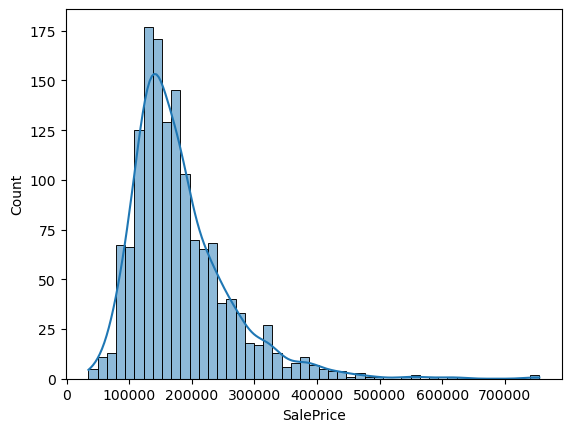

In [17]:
sns.histplot(df.SalePrice,kde=True)

we can see skewness towards rightwards 

Understanding the relation between Target and other features

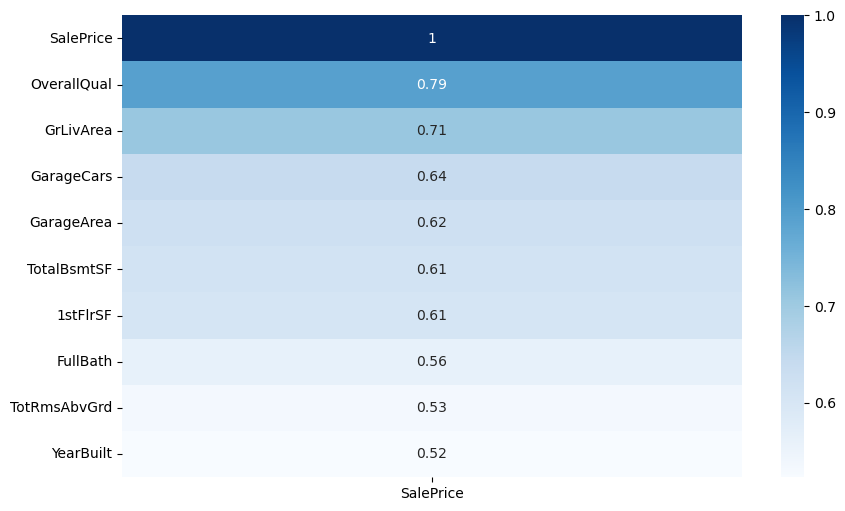

In [18]:
plt.figure(figsize=(10,6))
sale_price=df.corr(numeric_only=True)['SalePrice']
top_corr=sale_price.sort_values(ascending=False).head(10)
sns.heatmap(top_corr.to_frame(),annot=True,cmap='Blues')
plt.show()

The null values in Electrical column should be replaced by using mode becauese it has very few values and it is a discreate value

# 2.A>Machine learning model

we have separate target variable from data then we will train the data nd test the data

In [19]:
x=df.drop('SalePrice',axis=1)

In [20]:
y=df['SalePrice']

#### Encoding

The machine learning model cannot train and test categorical data.
So we must perform encoding to convert categorical data to numerical data 

we perform one hot encoding 

In [21]:
x = pd.get_dummies(x, drop_first=True)

#### Train-Test-Split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

checking whether all the categorical data is coverted to numerical

In [23]:
x.select_dtypes(include='object').columns

Index([], dtype='object')

#### Linear Regression

model building

In [24]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

model testing

In [25]:
y_pred=lr.predict(x_test)
y_pred

array([152285.87662742, 153317.60685395, 147530.2820912 , 116574.26794736,
       133803.80581147, 192515.75879496, 178737.34400988, 183022.89554181,
       145440.77817063, 128329.10349743, 116161.59702612, 261645.91255999,
       110928.34509704, 150949.9078062 , 235017.36855846,  88680.91972786,
       171669.71097274, 179562.11221884, 257843.79838411,  97568.46602777,
       147390.38915866, 134625.02843473, 166610.7879141 , 213832.51974549,
       163473.25933334, 164110.53424699, 269601.33168173, 187717.55527746,
       176513.12844663,  99875.6729719 , 203016.29291109, 249204.71328777,
       223161.52231269, 200708.8486389 , 332707.32382508, 100257.88342331,
       229035.52654444, 354591.16915982, 169083.35721419, 106270.26838798,
       105978.17853923, 274343.7213301 , 149888.27619398, 177956.0283788 ,
       210360.19521693, 189990.55831028, 150489.31688733,  89500.11792384,
        40684.04359452, 155243.84684064, 335954.41803937,  51046.82925348,
       149080.97928038,  

MAE
Error occured between actual value and predicted value

In [26]:
mae=mean_absolute_error(y_test,y_pred)
mae

16829.60248619327

MSE
average of squared difference between actual value and predicted value

In [27]:
mse=mean_squared_error(y_test,y_pred)
mse

552735467.8039294

R2_score
It defines how the price is varying based on the features

In [28]:
r2=r2_score(y_test,y_pred)
r2

0.8899799496917769

#### Random Forest

model building

In [29]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

model testing

In [30]:
y_pred=rf.predict(x_test)
y_pred

array([162360.44, 126266.5 , 146036.  , 122567.74, 146548.24, 173764.28,
       163383.9 , 190961.17, 144370.75, 116966.88, 153865.69, 301539.91,
       129208.5 , 131708.  , 241756.19,  87708.76, 185503.98, 181619.92,
       252141.02, 115984.5 , 143807.12, 125029.5 , 173287.4 , 206904.48,
       141370.5 , 180213.  , 218505.47, 198332.44, 173773.12, 123203.65,
       182695.49, 194811.65, 206288.19, 178478.1 , 300217.28, 103419.5 ,
       168883.  , 327258.94, 145338.  , 107289.76, 104352.66, 192365.24,
       139996.87, 148591.99, 194648.8 , 189739.  , 148690.5 , 112871.88,
        71915.46, 134402.55, 286119.65,  94236.8 , 151963.06,  92976.5 ,
       105813.82, 145952.  , 177354.8 , 112549.04, 190195.82, 130232.  ,
       107361.06, 138989.25, 121478.  , 378416.27, 300709.4 , 119527.9 ,
       356997.47, 133300.  ,  94690.5 , 352498.97, 159785.72, 132196.94,
       194715.28, 188952.71,  96488.31, 172985.07, 183910.01, 144032.  ,
       209082.87, 181391.5 , 134522.37, 258861.87, 

In [31]:
mae=mean_absolute_error(y_test,y_pred)
mae

15487.136952054796

In [32]:
mse=mean_squared_error(y_test,y_pred)
mse

528966948.29024285

In [33]:
r2=r2_score(y_test,y_pred)
r2

0.8947109898818292

# 2.B>Relationship between house features and price

In [34]:
corr=df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

In [35]:
corr.head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [36]:
corr.tail()

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [37]:
feature_vs_price=pd.DataFrame({'feature':x_train.columns,'price':lr.coef_}).sort_values(by='price',ascending=False)

In [38]:
feature_vs_price.head()

,feature,price
113,RoofMatl_Membran,657077.830286
118,RoofMatl_WdShngl,636972.725697
114,RoofMatl_Metal,620653.479111
112,RoofMatl_CompShg,566912.002228
117,RoofMatl_WdShake,565273.159928


In [39]:
feature_vs_price.tail()

,feature,price
93,Condition2_RRAe,-114076.990506
237,PoolQC_Gd,-131104.197330
227,GarageQual_Po,-138604.919491
236,PoolQC_Fa,-150243.436340
92,Condition2_PosN,-229038.883259


# 3.> Suggestions for customers to buy House according to their requirements

Factors increasing the price of the house
-Newer House
-Presence of Garage
-Larger living area
-House build with a good quality materials

Factors decreasing the price of the house
-Reused House
-No Garage
-Smaller living area
-House build with a average quality materials

If a buyer have very low budget then they can take a older house and 
renovate it to their requirements 

So overall we can say that price of the house is dependent mainly on quality of materials used,living area capacity,presence of the garage and with the quality of materials build.The rates may vary by adding the addition features.So customer can take the house based on their requirments and their budget.

# Model Comparison Report

# Challenges Faced